<a href="https://colab.research.google.com/github/LuisGTZB/hacking-civico/blob/master/proyecto/Proyecto_Hacking_civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Hacking-Cívico

### Análisis sobre las acciones de inspección y vigilancia ambiental en México 

#### La informacion se puede consultar [dando click aqui](https://datos.gob.mx/busca/dataset/acciones-de-inspeccion-en-materia-de-impacto-ambiental-y-zofemat)

In [ ]:
#Importacion del archivo
from google.colab import files 
files.upload()

In [221]:
#importación de librerias
import statistics
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [222]:
#Asignación de variables y unificacion de los datos
inspeccion = 'accionesInspeccioniazofemat.csv'
datos = pd.read_csv(inspeccion, encoding='latin-1')
data = pd.read_csv('accionesInspeccioniazofemat.csv', encoding='latin-1')
print(df.head())

               Entidad           Materia   Inspeccion
0       Aguascalientes  Impacto Ambiental           3
1      Baja California  Impacto Ambiental           5
2  Baja California Sur  Impacto Ambiental          25
3             Campeche  Impacto Ambiental           7
4              Chiapas  Impacto Ambiental          12


In [224]:
#Impresión de la base de datos completa 
datos

,Entidad,Materia,Inspeccion
0,Aguascalientes,Impacto Ambiental,3
1,Baja California,Impacto Ambiental,5
2,Baja California Sur,Impacto Ambiental,25
3,Campeche,Impacto Ambiental,7
4,Chiapas,Impacto Ambiental,12
5,Chihuahua,Impacto Ambiental,3
6,Coahuila,Impacto Ambiental,14
7,Colima,Impacto Ambiental,10
8,Durango,Impacto Ambiental,4
9,Guanajuato,Impacto Ambiental,8


In [225]:
#Ejecución para saber la longitud de la base de datos
print('Número de filas: {}'.format(data.shape[0]))
print('Número de columnas: {}'.format(data.shape[1]))

Número de filas: 51
Número de columnas: 3


## Gráfico para conocer el numero de inspecciones que se realizan por entidad 

In [226]:
#Generación del gráfico
grafico_Inspecciones = alt.Chart(datos).mark_bar(color='blue').encode(
    x = alt.X("Entidad:O"),
    y = alt.Y("Inspeccion:Q", title='Numero de inspecciones')
).properties(
    title = "Inspecciones por entidad",
    width = 850
)

In [227]:
#Impresión de gráfico
grafico_Inspecciones

alt.Chart(...)

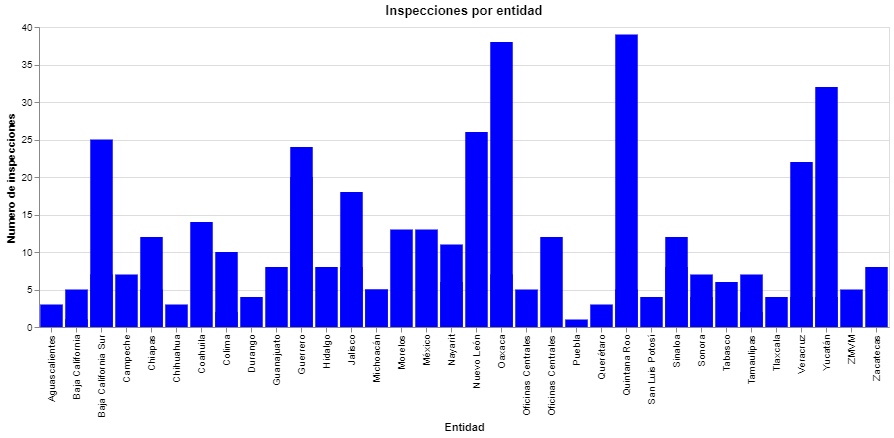

In [228]:
#Impresión de las columnas para descubrir un error en el nombre de "Materias" y que tiene un caracter de espacio
data.columns

Index(['Entidad', 'Materia ', 'Inspeccion'], dtype='object')

## Gráfico para conocer el numero de inspecciones que se realizan según el tipo de inspección

In [237]:
#Generación del gráfico
grafico_Materia = alt.Chart(datos).mark_bar(color='blue').encode(
    x = alt.X("Materia :O"),
    y = alt.Y("Inspeccion:Q", title='Numero de inspecciones')
).properties(
    title = "Inspecciones por Materia",
    width = 550
)

In [238]:
#Impresión de gráfico
grafico_Materia

alt.Chart(...)

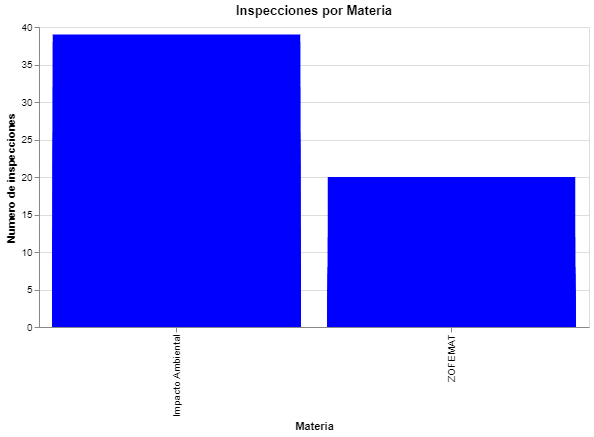

# Querys para responder algunas preguntas

In [231]:
#¿De que tipo de inspecciones se realizan más? 
data.groupby('Materia ').Inspeccion.count()

Materia 
Impacto Ambiental    33
ZOFEMAT              18
Name: Inspeccion, dtype: int64

In [232]:
#¿Cuántas inspecciones se hacen en Guanajuato?

data[data.Entidad  == 'Guanajuato'].Inspeccion.value_counts()



8    1
Name: Inspeccion, dtype: int64

In [213]:
#¿Que tipo y numero inspeccion hacen según la Entidad?
data.groupby('Entidad').agg({'Materia ': ['min','max'],'Inspeccion': ['min','max']})

Materia                     Inspeccion    
                                   min                max        min max
Entidad                                                                 
Aguascalientes       Impacto Ambiental  Impacto Ambiental          3   3
Baja California      Impacto Ambiental            ZOFEMAT          1   5
Baja California Sur  Impacto Ambiental            ZOFEMAT          7  25
Campeche             Impacto Ambiental            ZOFEMAT          0   7
Chiapas              Impacto Ambiental            ZOFEMAT          5  12
Chihuahua            Impacto Ambiental  Impacto Ambiental          3   3
Coahuila             Impacto Ambiental  Impacto Ambiental         14  14
Colima               Impacto Ambiental            ZOFEMAT          2  10
Durango              Impacto Ambiental  Impacto Ambiental          4   4
Guanajuato           Impacto Ambiental  Impacto Ambiental          8   8
Guerrero             Impacto Ambiental            ZOFEMAT         20  24
Hidalgo              Impacto Ambiental  Impacto Ambiental          8   8
Jalisco              Impacto Ambiental            ZOFEMAT          8  18
Michoacán            Impacto Ambiental            ZOFEMAT          5   5
Morelos              Impacto Ambiental  Impacto Ambiental         13  13
México               Impacto Ambiental  Impacto Ambiental         13  13
Nayarit              Impacto Ambiental            ZOFEMAT          6  11
Nuevo León           Impacto Ambiental  Impacto Ambiental         26  26
Oaxaca               Impacto Ambiental            ZOFEMAT          7  38
Oficinas Centrales   Impacto Ambiental  Impacto Ambiental          5   5
Oficinas Centrales             ZOFEMAT            ZOFEMAT         12  12
Puebla               Impacto Ambiental  Impacto Ambiental          1   1
Querétaro            Impacto Ambiental  Impacto Ambiental          3   3
Quintana Roo         Impacto Ambiental            ZOFEMAT          5  39
San Luis Potosí      Impacto Ambiental  Impacto Ambiental          4   4
Sinaloa              Impacto Ambiental            ZOFEMAT          8  12
Sonora               Impacto Ambiental            ZOFEMAT          4   7
Tabasco              Impacto Ambiental            ZOFEMAT          0   6
Tamaulipas           Impacto Ambiental            ZOFEMAT          2   7
Tlaxcala             Impacto Ambiental  Impacto Ambiental          4   4
Veracruz             Impacto Ambiental            ZOFEMAT          4  22
Yucatán              Impacto Ambiental            ZOFEMAT          4  32
ZMVM                 Impacto Ambiental  Impacto Ambiental          5   5
Zacatecas            Impacto Ambiental  Impacto Ambiental          8   8

In [236]:
#¿En que entidades no se hacen inspecciones?
data[data.Inspeccion == 0].Entidad.value_counts()

Campeche    1
Tabasco     1
Name: Entidad, dtype: int64

## Conslusión:
*En base a los datos presentados anteriormete podemos responder a la pregunta de si el gobierno Federal tanto como los Estatales se esta preocupando por vigilar las acciones que puedden tener un impacto negativo en el medio ambiente y en su caso sancionarlas.* 

*Se respondieron varias preguntas que podrian ser de utilidad para dar un seguimiento a lo que hacen los gobiernos locales y el gobierno federal para mitigar estos impactos ya que como se ve hay dos estados en los cuales no se hace ninguna inspeccion de este tipo.*

#### Las preguntas que se contestaron aqui fueron las siguientes:
- ¿De que tipo de inspecciones se realizan más? 
- ¿Cuántas inspecciones se hacen en Guanajuato?
- ¿Que tipo y numero inspeccion hacen según la Entidad?
- ¿En que entidades no se hacen inspecciones? 


### Referencias

*Toda la informacion que fue utilizada aqui se puede consultar [aqui](https://datos.gob.mx/busca/dataset/acciones-de-inspeccion-en-materia-de-impacto-ambiental-y-zofemat/resource/5f354328-7095-4474-9e2d-912a345e5dd0)*